<a href="https://colab.research.google.com/github/Jeongyeon-Myeong/shopping-mall-item-classification/blob/main/image_classification_using_shoppingmall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 이미지 파일 저장 경로 생성하기
# 파일 경로 생성 
import os 
os.mkdir("/content/imgCNN_test")
os.mkdir("/content/imgCNN_train")
#'pants'
os.mkdir("/content/imgCNN_test/0")
os.mkdir("/content/imgCNN_train/0")
#,'onepiece'
os.mkdir("/content/imgCNN_test/1")
os.mkdir("/content/imgCNN_train/1")
#,'bags'
os.mkdir("/content/imgCNN_test/2")
os.mkdir("/content/imgCNN_train/2")
#'shoes'
os.mkdir("/content/imgCNN_test/3")
os.mkdir("/content/imgCNN_train/3")
#'tshirt'
os.mkdir("/content/imgCNN_test/4")
os.mkdir("/content/imgCNN_train/4")

FileExistsError: ignored

In [ ]:
os.chdir('/content')

In [ ]:
currentPath = os.getcwd()
print (currentPath)

/content


In [ ]:
import torch
import torchvision #common datasets 을 갖고 있다
import torchvision.transforms as transforms

In [ ]:
 
#name = "sweater_0.png"
#print(os.path.isfile(name))
 
# ( 혹시 잘못 생성된 파일들이 있다면 ) 파일 삭제 
"""
for i in range(170,199) :
  name  = "skincare_" +str(i) + ".png"
  if os.path.isfile(name) :
    os.remove(name)
"""

In [ ]:
 transform = transforms.Compose([transforms.Resize((224,224)),
                                    transforms.ToTensor(),
                               transforms.Normalize(mean = [0.5, 0.5, 0.5],
                                                         std = [0.5, 0.5, 0.5])])

In [ ]:
train_data = torchvision.datasets.ImageFolder(root='./imgCNN_train/', transform=transform)
test_data = torchvision.datasets.ImageFolder(root='./imgCNN_test/', transform=transform)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: ./imgCNN_train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [ ]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_data, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('pants','onepiece','bags','shoes','tshirt') #5개 카테고리로 분류

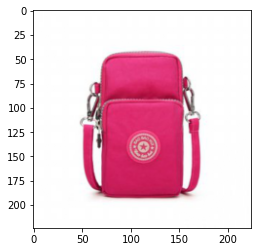

bags


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# functions to show an image
 
 
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
 
 
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
 
# show images
imshow(torchvision.utils.make_grid(images[3]))
print(classes[labels[3]])

In [ ]:
trainloader

In [ ]:
## nn.layer 한개의 layer
import torch.nn as nn
import torch.nn.functional as F
 
## pytorch의 기본적 구조
class Net(nn.Module):
  ## model에서 사용될 모듈을 정의,
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5) # 5개로 분류하므로
## 모델에서 행해져야 하는 계산을 정의, forward와 backward gradient 계산
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) ##init에서 정의한 것을 사용
        x = self.pool(F.relu(self.conv2(x))) ##init에서 정의한 것을 사용
        x = x.view(-1, 16 * 53 * 53)
        ## activation은 미리 정의한 것 사용하기보다 즉석에서 불러와서 사용
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
 
 
net = Net()

In [ ]:
# 3. Define a Loss function and optimizer
import torch.optim as optim
 
criterion = nn.CrossEntropyLoss()
## optimizer는 model의 parameter를 입력받는다.
## .cuda() cpu대신 gpu에 올라간다
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
## lr (learning rate)

In [ ]:
for epoch in range(15):  # loop over the dataset multiple times
## 모든 데이터셋에 대해 2번 학습
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients(epoch의 parameter gradient 0으로 초기화)
        optimizer.zero_grad()
 
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels) ## output과 target간 loss 계산
        loss.backward() ##loss와 chain rule 활용, 각 layer의 gradient 계산 
        ## 이전 gradient에 누적하여 계산
        ## model의 parameter update
        optimizer.step()
 
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
 
print('Finished Training')

[1,   200] loss: 3.150
[1,   400] loss: 2.854
[2,   200] loss: 2.502
[2,   400] loss: 2.491
[3,   200] loss: 2.245
[3,   400] loss: 2.076
[4,   200] loss: 1.823
[4,   400] loss: 1.671
[5,   200] loss: 1.398
[5,   400] loss: 1.325
[6,   200] loss: 0.770
[6,   400] loss: 0.879
[7,   200] loss: 0.494
[7,   400] loss: 0.669
[8,   200] loss: 0.357
[8,   400] loss: 0.442
[9,   200] loss: 0.179
[9,   400] loss: 0.222
[10,   200] loss: 0.153
[10,   400] loss: 0.182
[11,   200] loss: 0.076
[11,   400] loss: 0.152
[12,   200] loss: 0.165
[12,   400] loss: 0.109
[13,   200] loss: 0.056
[13,   400] loss: 0.056
[14,   200] loss: 0.040
[14,   400] loss: 0.013
[15,   200] loss: 0.009
[15,   400] loss: 0.010
[16,   200] loss: 0.004
[16,   400] loss: 0.001
[17,   200] loss: 0.002
[17,   400] loss: 0.001
[18,   200] loss: 0.002
[18,   400] loss: 0.000
Finished Training


[1,   200] loss: 2.043
[1,   400] loss: 1.882
[2,   200] loss: 1.424
[2,   400] loss: 1.476
[3,   200] loss: 1.158
[3,   400] loss: 1.044
[4,   200] loss: 0.557
[4,   400] loss: 0.576
[5,   200] loss: 0.363
[5,   400] loss: 0.391
[6,   200] loss: 0.145
[6,   400] loss: 0.355
[7,   200] loss: 0.104
[7,   400] loss: 0.116
[8,   200] loss: 0.128
[8,   400] loss: 0.210
[9,   200] loss: 0.103
[9,   400] loss: 0.114
[10,   200] loss: 0.071
[10,   400] loss: 0.104
[11,   200] loss: 0.055
[11,   400] loss: 0.073
[12,   200] loss: 0.022
[12,   400] loss: 0.078
[13,   200] loss: 0.070
[13,   400] loss: 0.241

loss가 증가하는 현상이 발생함.


In [ ]:
PATH = './training_model.pth'
## optimizer 상태를 저장하고 불러온다
torch.save(net.state_dict(), PATH)

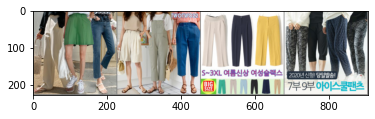

GroundTruth:  pants pants pants pants


In [ ]:
dataiter = iter(testloader) ## 데이터의 반복자 구하기
images, labels = dataiter.next()
 
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
## parameter와 buffer 등 모델의 상태를 현 모델로 복사한다

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)
 
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  onepiece tshirt tshirt shoes


In [ ]:
correct = 0
total = 0
with torch.no_grad(): 
    for data in testloader:
        # get the inputs; data is a list of [inputs, labels]
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels-1).sum().item()
    print('Accuracy of network on the test images :  %d %%' % ( 100*correct/total))

Accuracy of network on the test images :  7 %


In [ ]:
correct

38

In [ ]:
total

500

In [ ]:
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs,1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1
 
for i in range(5):
  print('Accuracy of %5s : %2d %%' %(classes[i], 100 + class_correct[i]/class_total[i]))

Accuracy of pants : 100 %
Accuracy of onepiece : 100 %
Accuracy of  bags : 100 %
Accuracy of shoes : 100 %
Accuracy of tshirt : 100 %
